# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

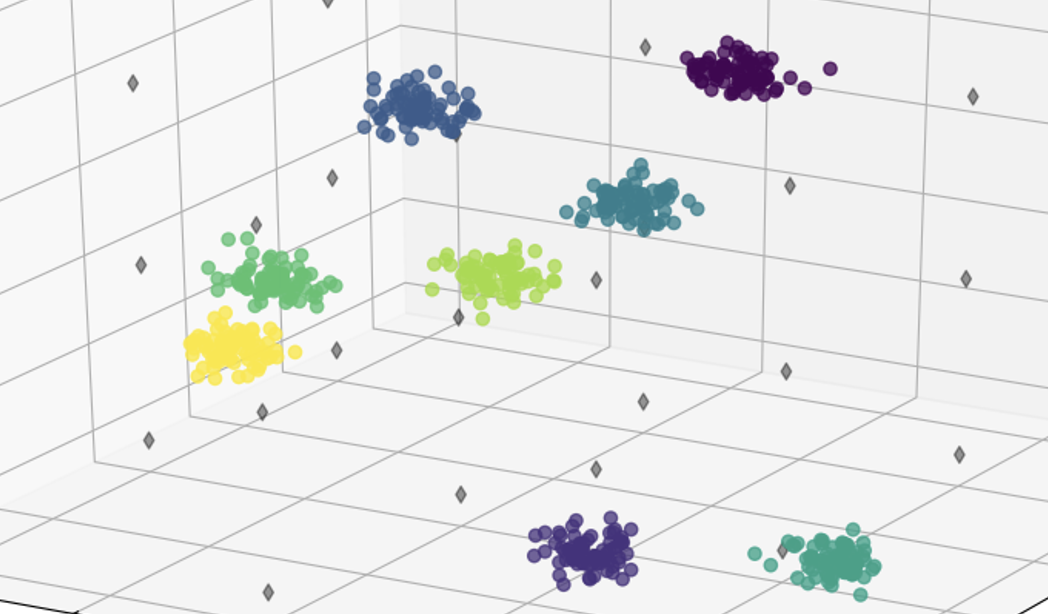

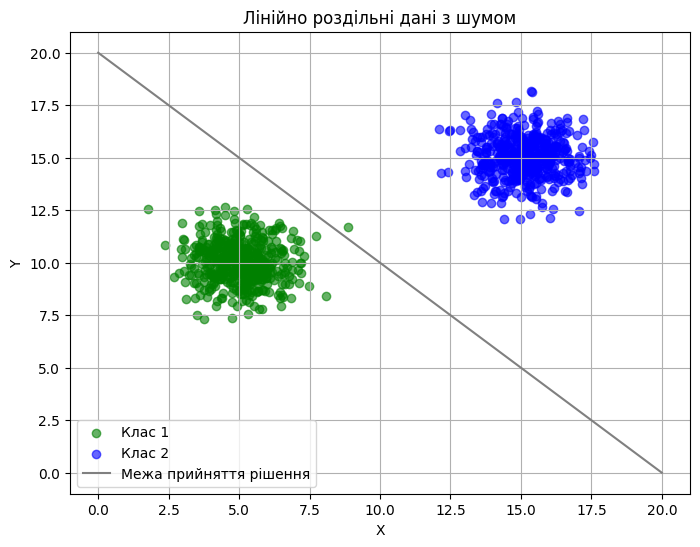

In [12]:
np.random.seed(42)

x1 = np.random.normal(5, 1.0, 500)
y1 = np.random.normal(10, 1.0, 500)
class1 = np.zeros(500)

x2 = np.random.normal(15, 1.0, 500)
y2 = np.random.normal(15, 1.0, 500)
class2 = np.ones(500)

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
class_labels = np.concatenate([class1, class2])

df = pd.DataFrame({"x": x, "y": y, "class": class_labels})

df.to_csv("linearly_separable_data.csv", index=False)

plt.figure(figsize=(8, 6))

plt.scatter(df[df["class"] == 0]["x"], df[df["class"] == 0]["y"], color="green", label="Клас 1", alpha=0.6)
plt.scatter(df[df["class"] == 1]["x"], df[df["class"] == 1]["y"], color="blue", label="Клас 2", alpha=0.6)

plt.plot([0, 20], [20, 0], color="grey", linestyle="-", label="Межа прийняття рішення")

plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Лінійно роздільні дані з шумом")
plt.show()


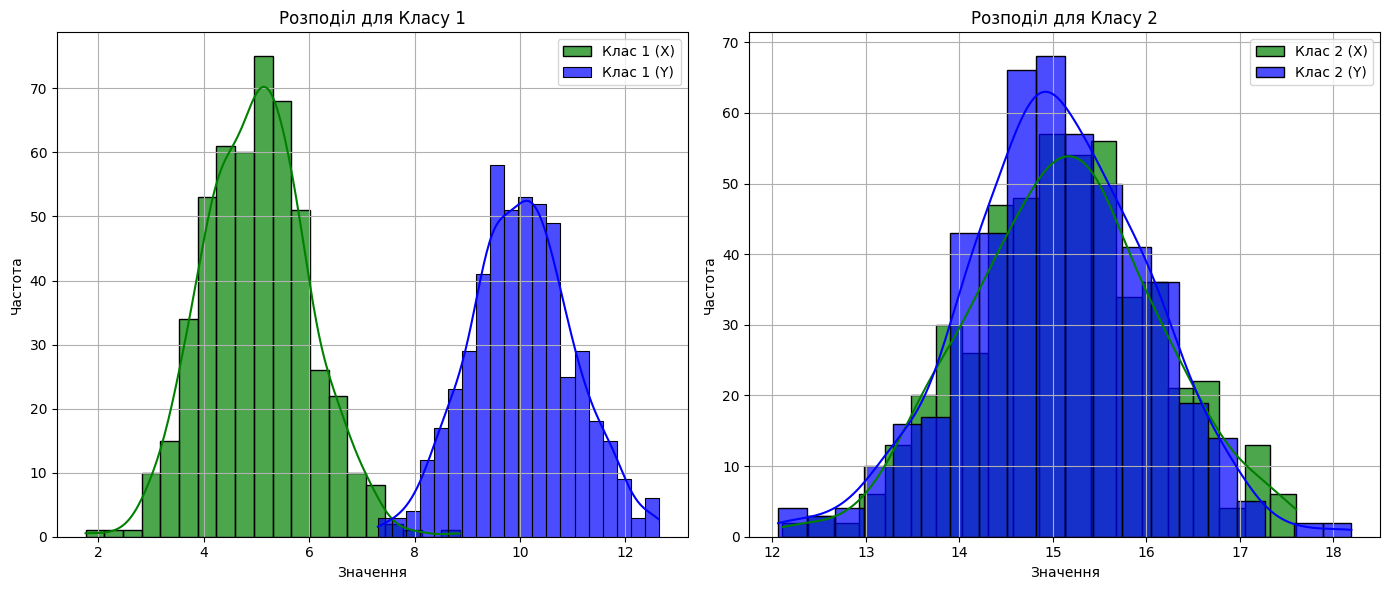

In [13]:
np.random.seed(42)

x1 = np.random.normal(5, 1.0, 500)
y1 = np.random.normal(10, 1.0, 500)
class1 = np.zeros(500)

x2 = np.random.normal(15, 1.0, 500)
y2 = np.random.normal(15, 1.0, 500)
class2 = np.ones(500)

x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
class_labels = np.concatenate([class1, class2])

df = pd.DataFrame({"x": x, "y": y, "class": class_labels})

class_1_x = df[df["class"] == 0]["x"]
class_1_y = df[df["class"] == 0]["y"]
class_2_x = df[df["class"] == 1]["x"]
class_2_y = df[df["class"] == 1]["y"]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(class_1_x, bins=20, color="green", kde=True, label="Клас 1 (X)", alpha=0.7)
sns.histplot(class_1_y, bins=20, color="blue", kde=True, label="Клас 1 (Y)", alpha=0.7)
plt.xlabel("Значення")
plt.ylabel("Частота")
plt.title("Розподіл для Класу 1")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(class_2_x, bins=20, color="green", kde=True, label="Клас 2 (X)", alpha=0.7)
sns.histplot(class_2_y, bins=20, color="blue", kde=True, label="Клас 2 (Y)", alpha=0.7)
plt.xlabel("Значення")
plt.ylabel("Частота")
plt.title("Розподіл для Класу 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Для створення набору даних використовувався нормальний розподіл для генерації двох класів точок з різними центроїдами, додавши невеликий шум для кожного класу. Дані були лінійно роздільні, і кожен клас мав 500 точок у двовимірному просторі.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

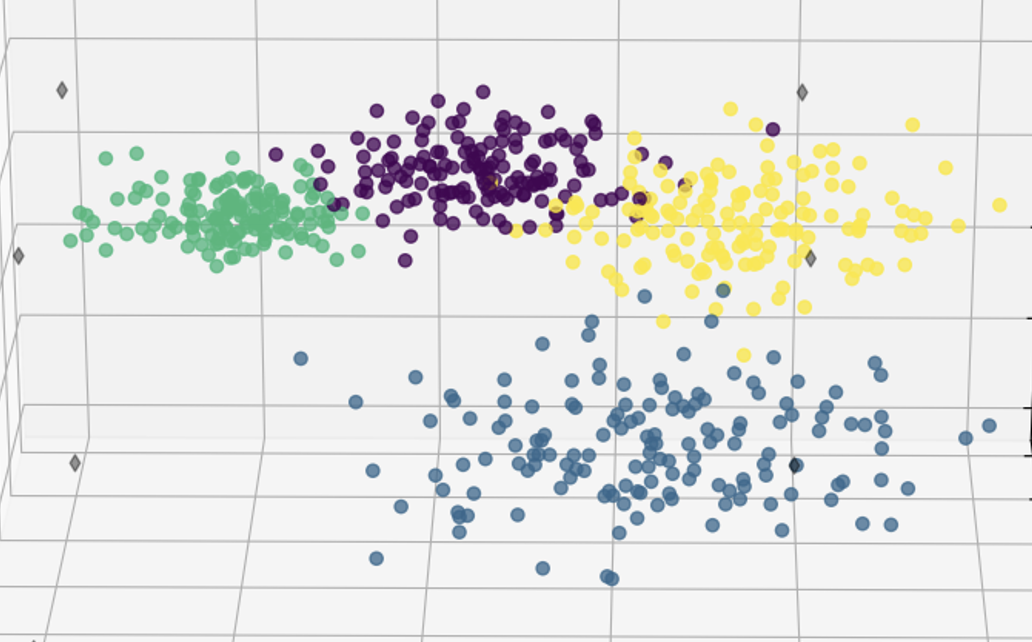

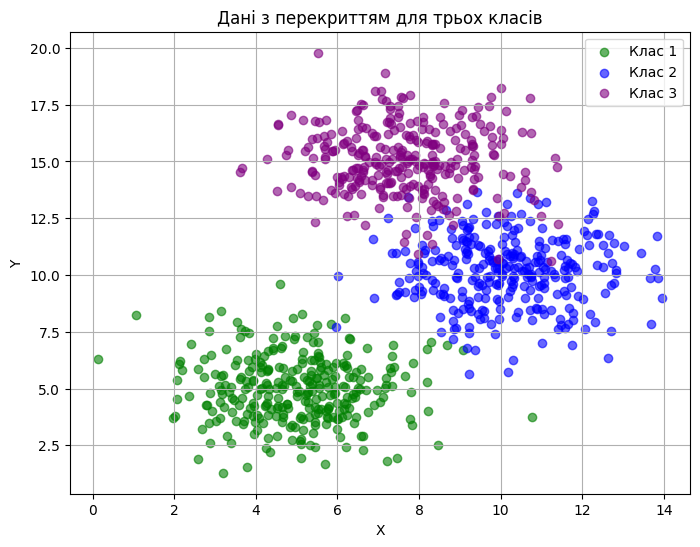

In [14]:
np.random.seed(42)

x1 = np.random.normal(5, 1.5, 300)
y1 = np.random.normal(5, 1.5, 300)
class1 = np.zeros(300)

x2 = np.random.normal(10, 1.5, 300)
y2 = np.random.normal(10, 1.5, 300)
class2 = np.ones(300)

x3 = np.random.normal(7.5, 1.5, 300)
y3 = np.random.normal(15, 1.5, 300)
class3 = np.full(300, 2)

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
class_labels = np.concatenate([class1, class2, class3])

df = pd.DataFrame({"x": x, "y": y, "class": class_labels})

df.to_csv("overlapping_classes_data.csv", index=False)

plt.figure(figsize=(8, 6))

plt.scatter(df[df["class"] == 0]["x"], df[df["class"] == 0]["y"], color="green", label="Клас 1", alpha=0.6)
plt.scatter(df[df["class"] == 1]["x"], df[df["class"] == 1]["y"], color="blue", label="Клас 2", alpha=0.6)
plt.scatter(df[df["class"] == 2]["x"], df[df["class"] == 2]["y"], color="purple", label="Клас 3", alpha=0.6)

plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Дані з перекриттям для трьох класів")
plt.show()

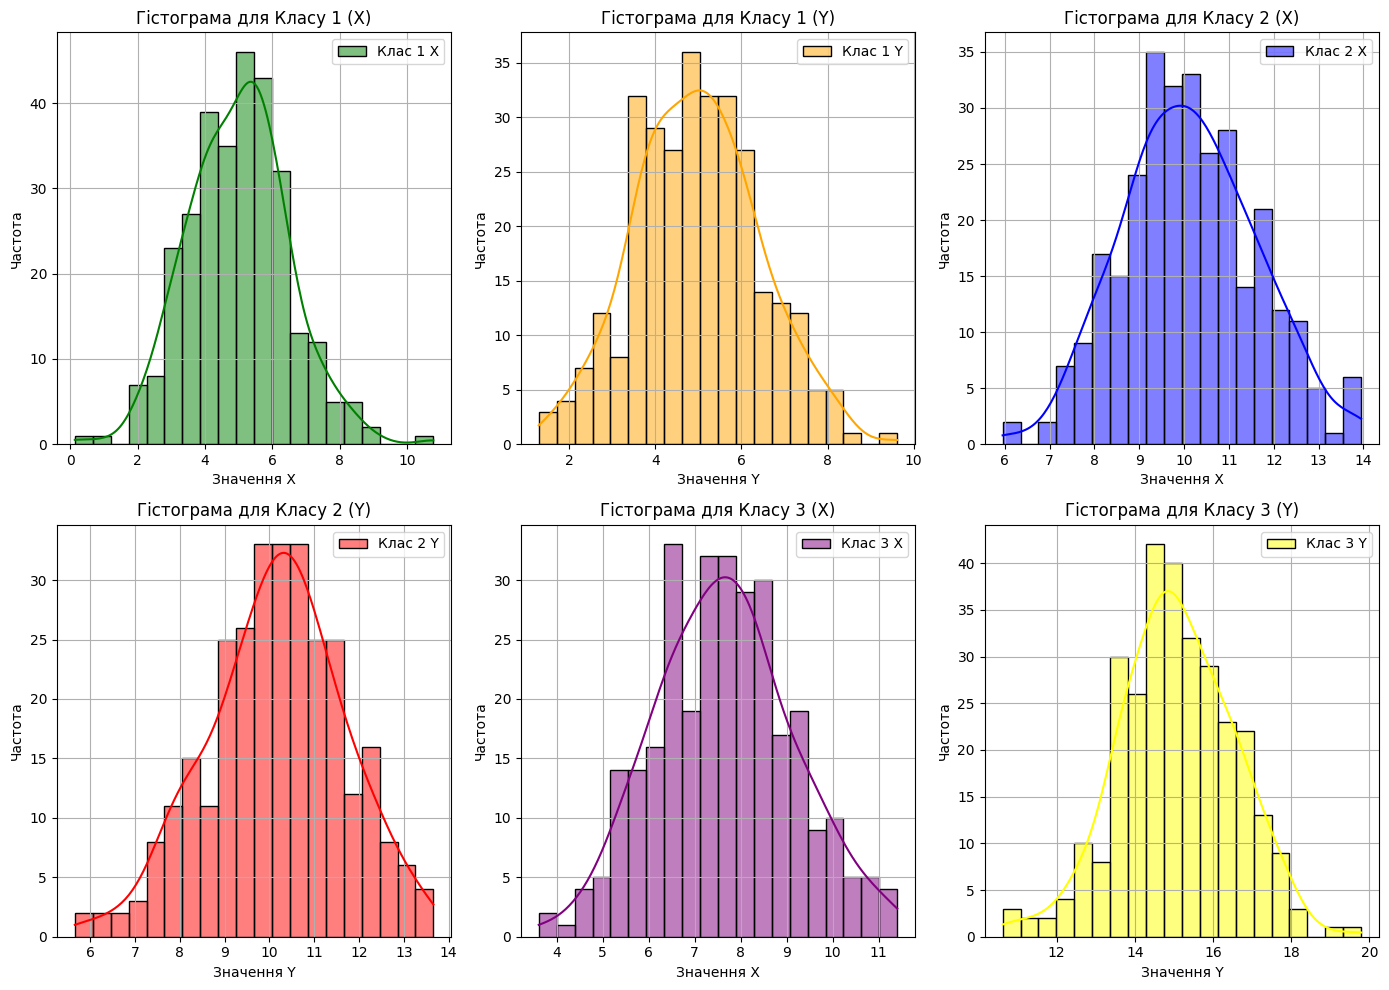

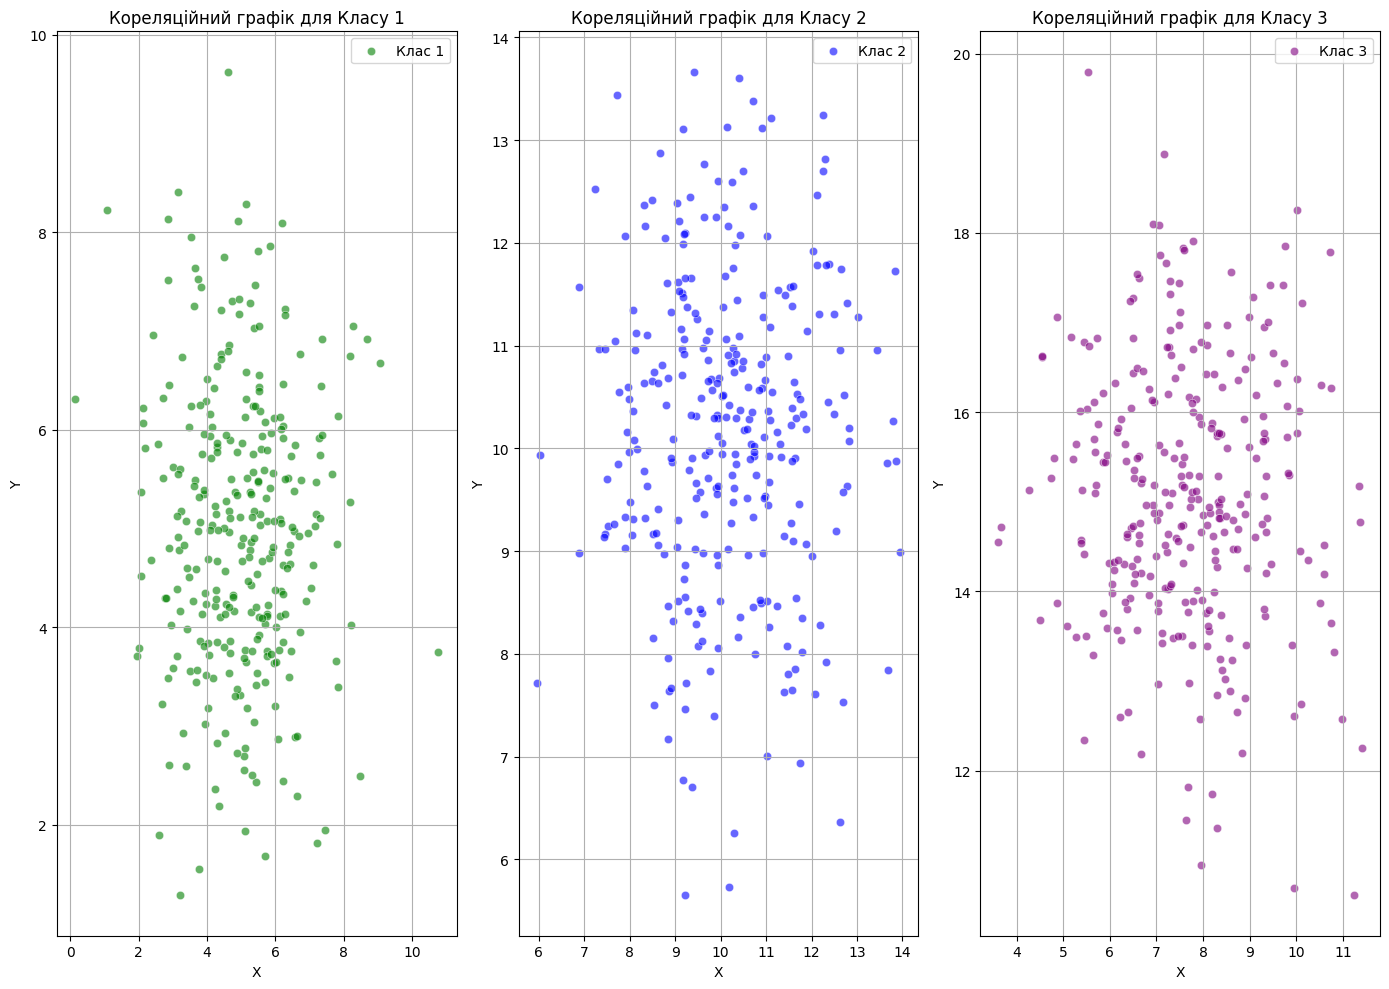

In [15]:
np.random.seed(42)

x1 = np.random.normal(5, 1.5, 300)
y1 = np.random.normal(5, 1.5, 300)
class1 = np.zeros(300)

x2 = np.random.normal(10, 1.5, 300)
y2 = np.random.normal(10, 1.5, 300)
class2 = np.ones(300)

x3 = np.random.normal(7.5, 1.5, 300)
y3 = np.random.normal(15, 1.5, 300)
class3 = np.full(300, 2)

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
class_labels = np.concatenate([class1, class2, class3])

df = pd.DataFrame({"x": x, "y": y, "class": class_labels})

plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(df[df["class"] == 0]["x"], bins=20, color="green", kde=True, label="Клас 1 X")
plt.xlabel("Значення X")
plt.ylabel("Частота")
plt.title("Гістограма для Класу 1 (X)")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
sns.histplot(df[df["class"] == 0]["y"], bins=20, color="orange", kde=True, label="Клас 1 Y")
plt.xlabel("Значення Y")
plt.ylabel("Частота")
plt.title("Гістограма для Класу 1 (Y)")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
sns.histplot(df[df["class"] == 1]["x"], bins=20, color="blue", kde=True, label="Клас 2 X")
plt.xlabel("Значення X")
plt.ylabel("Частота")
plt.title("Гістограма для Класу 2 (X)")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 4)
sns.histplot(df[df["class"] == 1]["y"], bins=20, color="red", kde=True, label="Клас 2 Y")
plt.xlabel("Значення Y")
plt.ylabel("Частота")
plt.title("Гістограма для Класу 2 (Y)")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
sns.histplot(df[df["class"] == 2]["x"], bins=20, color="purple", kde=True, label="Клас 3 X")
plt.xlabel("Значення X")
plt.ylabel("Частота")
plt.title("Гістограма для Класу 3 (X)")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 6)
sns.histplot(df[df["class"] == 2]["y"], bins=20, color="yellow", kde=True, label="Клас 3 Y")
plt.xlabel("Значення Y")
plt.ylabel("Частота")
plt.title("Гістограма для Класу 3 (Y)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Кореляційні графіки
plt.figure(figsize=(14, 10))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df[df["class"] == 0]["x"], y=df[df["class"] == 0]["y"], color="green", label="Клас 1", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Кореляційний графік для Класу 1")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
sns.scatterplot(x=df[df["class"] == 1]["x"], y=df[df["class"] == 1]["y"], color="blue", label="Клас 2", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Кореляційний графік для Класу 2")
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
sns.scatterplot(x=df[df["class"] == 2]["x"], y=df[df["class"] == 2]["y"], color="purple", label="Клас 3", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Кореляційний графік для Класу 3")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

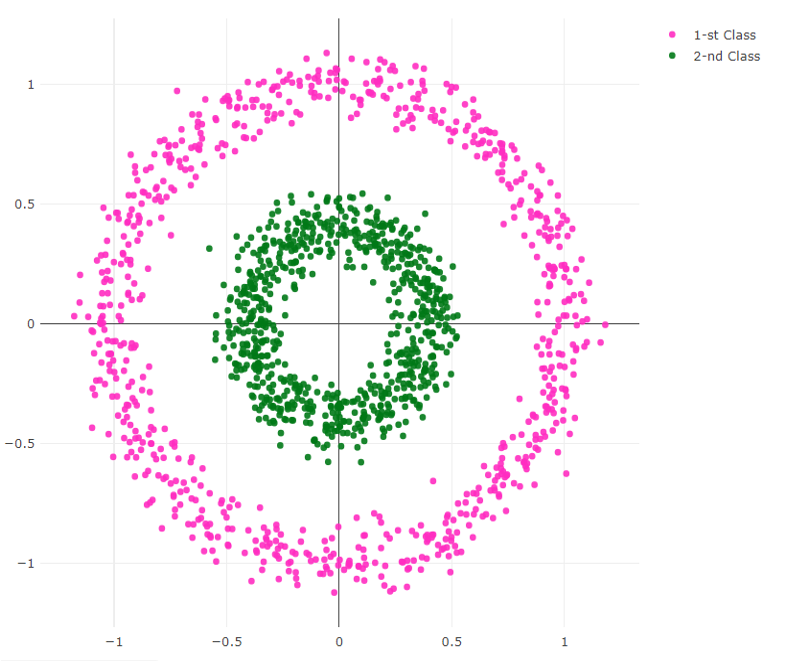

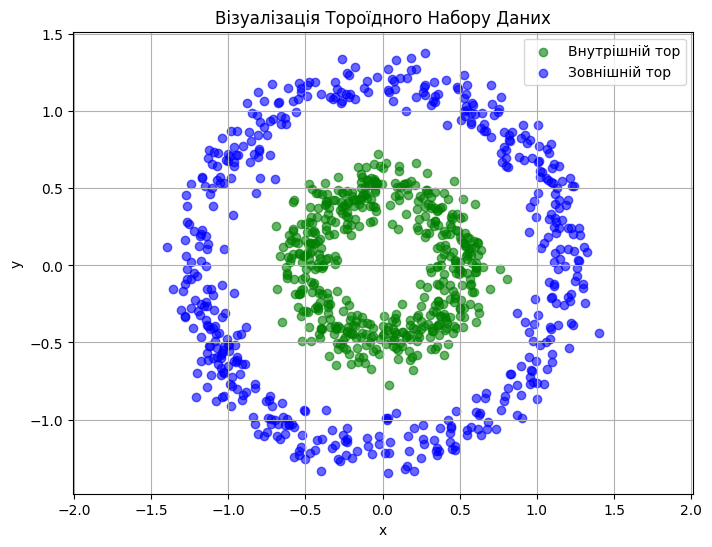

In [16]:
n_samples = 500
noise_inner = 0.1
noise_outer = 0.1

r_inner = 0.5
theta_inner = np.random.uniform(0, 2 * np.pi, n_samples)
x_inner = r_inner * np.cos(theta_inner) + np.random.normal(0, noise_inner, n_samples)
y_inner = r_inner * np.sin(theta_inner) + np.random.normal(0, noise_inner, n_samples)
class_inner = np.ones(n_samples)

r_outer = 1.2
theta_outer = np.random.uniform(0, 2 * np.pi, n_samples)
x_outer = r_outer * np.cos(theta_outer) + np.random.normal(0, noise_outer, n_samples)
y_outer = r_outer * np.sin(theta_outer) + np.random.normal(0, noise_outer, n_samples)
class_outer = np.full(n_samples, 2)

data = pd.DataFrame({
    'x': np.concatenate([x_inner, x_outer]),
    'y': np.concatenate([y_inner, y_outer]),
    'class': np.concatenate([class_inner, class_outer])
})

data.to_csv('toroidal_dataset.csv', index=False)

plt.figure(figsize=(8, 6))
plt.scatter(x_inner, y_inner, c='green', label='Внутрішній тор', alpha=0.6)
plt.scatter(x_outer, y_outer, c='blue', label='Зовнішній тор', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Візуалізація Тороїдного Набору Даних')
plt.grid(True)
plt.axis('equal')
plt.show()

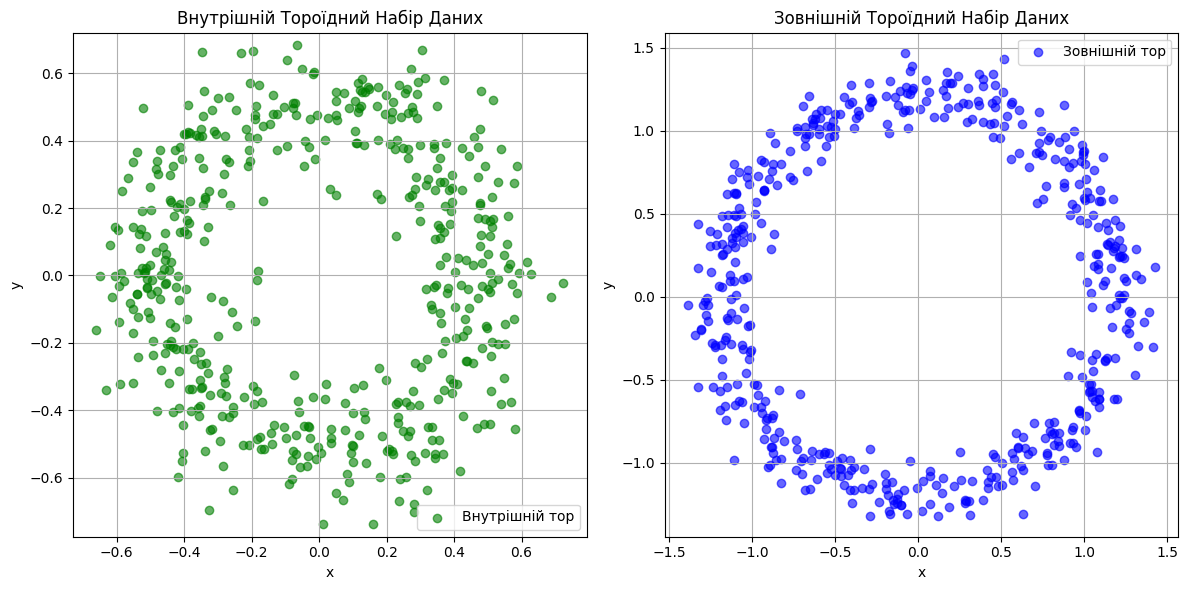

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 500
noise_inner = 0.1
noise_outer = 0.1

r_inner = 0.5
theta_inner = np.random.uniform(0, 2 * np.pi, n_samples)
x_inner = r_inner * np.cos(theta_inner) + np.random.normal(0, noise_inner, n_samples)
y_inner = r_inner * np.sin(theta_inner) + np.random.normal(0, noise_inner, n_samples)
class_inner = np.ones(n_samples)

r_outer = 1.2
theta_outer = np.random.uniform(0, 2 * np.pi, n_samples)
x_outer = r_outer * np.cos(theta_outer) + np.random.normal(0, noise_outer, n_samples)
y_outer = r_outer * np.sin(theta_outer) + np.random.normal(0, noise_outer, n_samples)
class_outer = np.full(n_samples, 2)

data = pd.DataFrame({
    'x': np.concatenate([x_inner, x_outer]),
    'y': np.concatenate([y_inner, y_outer]),
    'class': np.concatenate([class_inner, class_outer])
})

data.to_csv('toroidal_dataset.csv', index=False)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_inner, y_inner, c='green', label='Внутрішній тор', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Внутрішній Тороїдний Набір Даних')
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(x_outer, y_outer, c='blue', label='Зовнішній тор', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Зовнішній Тороїдний Набір Даних')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()


**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

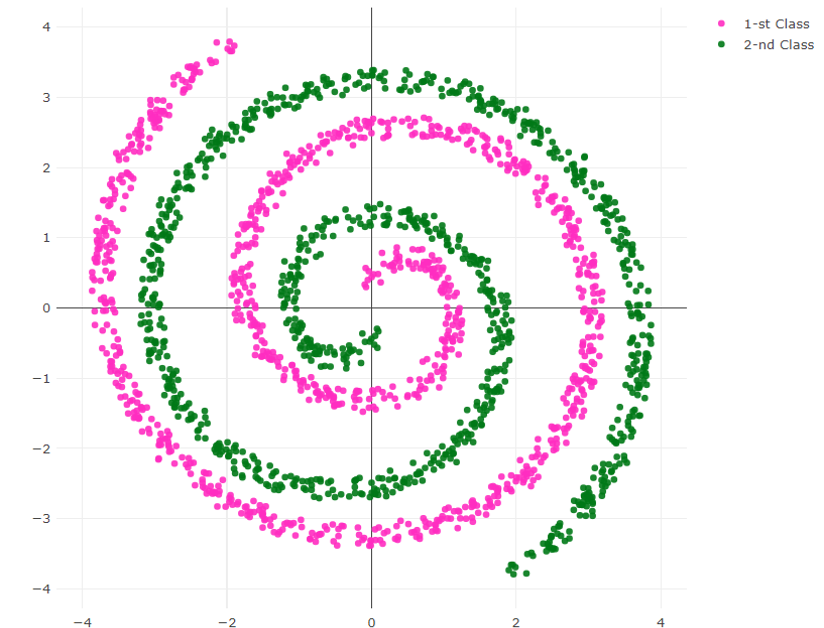

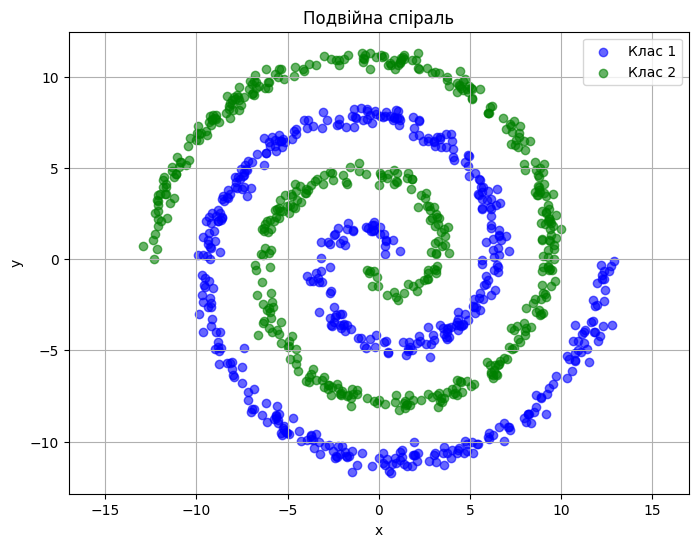

In [18]:
n_samples = 500
noise = 0.3

theta_1 = np.sqrt(np.random.rand(n_samples)) * 4 * np.pi
r_1 = theta_1 + np.random.normal(0, noise, n_samples)
x_1 = r_1 * np.cos(theta_1)
y_1 = r_1 * np.sin(theta_1)
class_1 = np.ones(n_samples)

theta_2 = np.sqrt(np.random.rand(n_samples)) * 4 * np.pi
r_2 = theta_2 + np.random.normal(0, noise, n_samples)
x_2 = -r_2 * np.cos(theta_2)
y_2 = -r_2 * np.sin(theta_2)
class_2 = np.full(n_samples, 2)

data = pd.DataFrame({
    'x': np.concatenate([x_1, x_2]),
    'y': np.concatenate([y_1, y_2]),
    'class': np.concatenate([class_1, class_2])
})

data.to_csv('spiral_dataset.csv', index=False)

plt.figure(figsize=(8, 6))

plt.scatter(x_1, y_1, c='blue', label='Клас 1', alpha=0.6)
plt.scatter(x_2, y_2, c='green', label='Клас 2', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Подвійна спіраль')
plt.grid(True)
plt.axis('equal')
plt.show()

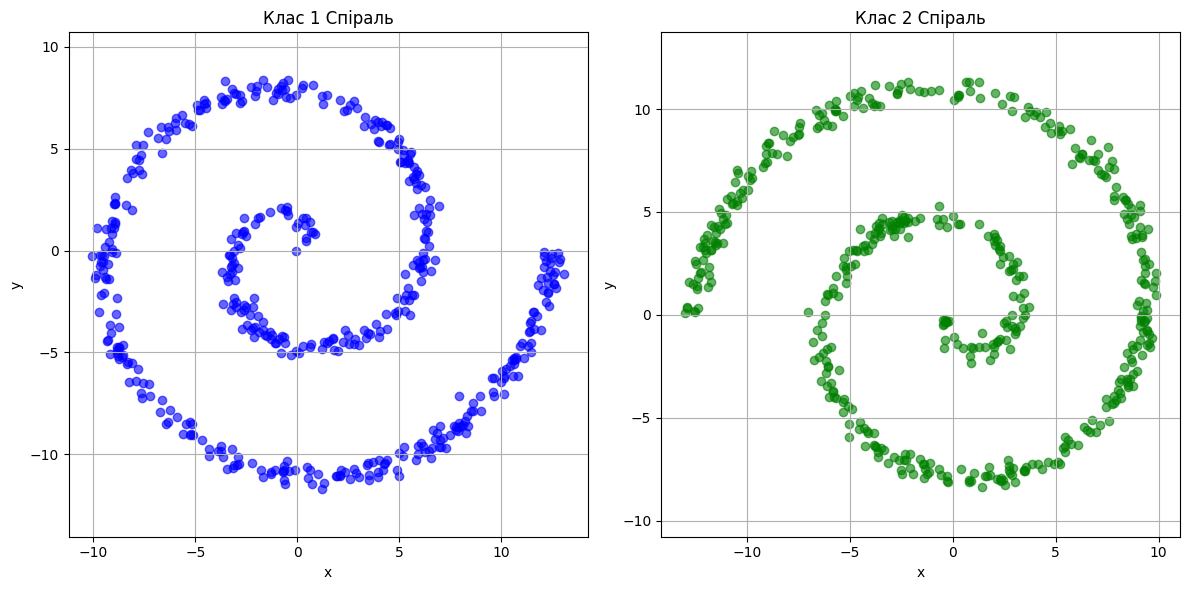

In [19]:
n_samples = 500
noise = 0.3

theta_1 = np.sqrt(np.random.rand(n_samples)) * 4 * np.pi
r_1 = theta_1 + np.random.normal(0, noise, n_samples)
x_1 = r_1 * np.cos(theta_1)
y_1 = r_1 * np.sin(theta_1)
class_1 = np.ones(n_samples)

theta_2 = np.sqrt(np.random.rand(n_samples)) * 4 * np.pi
r_2 = theta_2 + np.random.normal(0, noise, n_samples)
x_2 = -r_2 * np.cos(theta_2)
y_2 = -r_2 * np.sin(theta_2)
class_2 = np.full(n_samples, 2)

data = pd.DataFrame({
    'x': np.concatenate([x_1, x_2]),
    'y': np.concatenate([y_1, y_2]),
    'class': np.concatenate([class_1, class_2])
})

data.to_csv('spiral_dataset.csv', index=False)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_1, y_1, c='blue', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Клас 1 Спіраль')
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(x_2, y_2, c='green', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Клас 2 Спіраль')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

Процес генерації даних включає створення двох спіралей, одна з яких обгортає іншу. Для кожної спіралі ми обчислюємо кути та радіуси, використовуючи випадкові значення, щоб забезпечити рівномірний розподіл точок. Перша спіраль має позитивний напрямок закручування, а друга — негативний. Радіуси змінюються разом із кутами, і додається невеликий шум для створення варіативності. Результатом є дві спіралі, які перетинаються і формують складний розподіл точок у двовимірному просторі.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

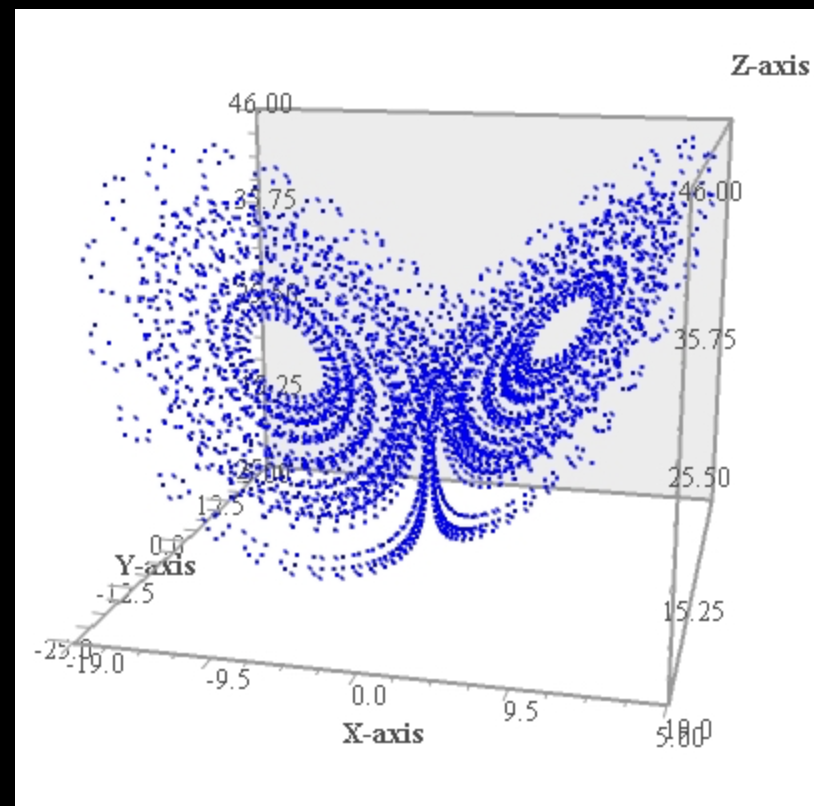

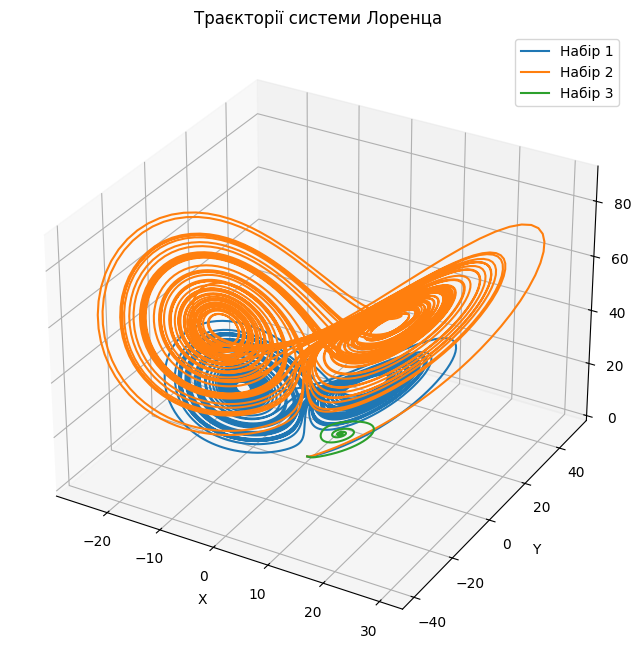

In [20]:
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

params = [(10, 28, 8/3), (10, 50, 8/3), (28, 10, 8/3)]

t = np.linspace(0, 50, 10000)

initial_state = [0, 1, 0]

trajectories = [odeint(lorenz, initial_state, t, args=p) for p in params]

plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

for i, traj in enumerate(trajectories):
    ax.plot3D(traj[:, 0], traj[:, 1], traj[:, 2], label=f'Набір {i+1}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Траєкторії системи Лоренца')
ax.legend()

plt.show()

Аналіз системи Лоренца показує, як зміна параметрів впливає на її поведінку. Наприклад, зменшення параметра $\rho$ може призвести до зменшення хаотичності та стабілізації траєкторії, тоді як збільшення $\sigma$ або $\beta$ може посилити хаотичність і призвести до більш складних патернів. Візуалізація траєкторій допомагає зрозуміти, як змінюються траєкторії в залежності від параметрів і чи відбуваються переходи від стабільних до хаотичних режимів.